# ***Predict Autism Spectrum Disorder in Child***

![pic1](signs_of_autism.jpg)
![pic2](signs_of_autism1.jpg)

#### **Import the required packages**

In [1]:
import numpy as np
import pandas as pd
import scipy.io.arff as arff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

#### **Import the ARFF(Attribute Relational File Format) Dataset file**

In [2]:
arff.loadarff('Autism-Adult-Data.arff')[0]

array([(b'1', b'1', b'1', b'1', b'0', b'0', b'1', b'1', b'0', b'0',  26., b'f', b'White-European', b'no', b'no', b'United States', b'no',  6., b'18 and more', b'Self', b'NO'),
       (b'1', b'1', b'0', b'1', b'0', b'0', b'0', b'1', b'0', b'1',  24., b'm', b'Latino', b'no', b'yes', b'Brazil', b'no',  5., b'18 and more', b'Self', b'NO'),
       (b'1', b'1', b'0', b'1', b'1', b'0', b'1', b'1', b'1', b'1',  27., b'm', b'Latino', b'yes', b'yes', b'Spain', b'no',  8., b'18 and more', b'Parent', b'YES'),
       (b'1', b'1', b'0', b'1', b'0', b'0', b'1', b'1', b'0', b'1',  35., b'f', b'White-European', b'no', b'yes', b'United States', b'no',  6., b'18 and more', b'Self', b'NO'),
       (b'1', b'0', b'0', b'0', b'0', b'0', b'0', b'1', b'0', b'0',  40., b'f', b'?', b'no', b'no', b'Egypt', b'no',  2., b'18 and more', b'?', b'NO'),
       (b'1', b'1', b'1', b'1', b'1', b'0', b'1', b'1', b'1', b'1',  36., b'm', b'Others', b'yes', b'no', b'United States', b'no',  9., b'18 and more', b'Self', b'YES')

In [3]:
arff.loadarff('Autism-Adult-Data.arff')[1]

Dataset: adult-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-10
	A1_Score's type is nominal, range is ('0', '1')
	A2_Score's type is nominal, range is ('0', '1')
	A3_Score's type is nominal, range is ('0', '1')
	A4_Score's type is nominal, range is ('0', '1')
	A5_Score's type is nominal, range is ('0', '1')
	A6_Score's type is nominal, range is ('0', '1')
	A7_Score's type is nominal, range is ('0', '1')
	A8_Score's type is nominal, range is ('0', '1')
	A9_Score's type is nominal, range is ('0', '1')
	A10_Score's type is nominal, range is ('0', '1')
	age's type is numeric
	gender's type is nominal, range is ('f', 'm')
	ethnicity's type is nominal, range is ('White-European', 'Latino', 'Others', 'Black', 'Asian', 'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic', 'Turkish', 'others')
	jundice's type is nominal, range is ('no', 'yes')
	austim's type is nominal, range is ('no', 'yes')
	contry_of_res's type is nominal, range is ('United States', 'Brazil', 'Spain', 'Egyp

#### **Creating DataFrame from ARFF file**

In [4]:
autism_dataset = pd.DataFrame(arff.loadarff('Autism-Adult-Data.arff')[0])

In [5]:
autism_dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


# ***INITIAL Data Analysis (IDA)***

#### **Changing the character encoding**

In [6]:
def apply_decode(df_name):
    for col in df_name.columns:
        if df_name[col].dtype != 'float64':
            df_name[col] = df_name[col].apply(lambda val : val.decode('utf-8'))
    pd.set_option('display.max_columns',50)
    return df_name

In [7]:
autism_df = apply_decode(autism_dataset)

In [8]:
autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


#### **Dataset Features**

In [9]:
autism_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
len(autism_df.columns)

21

In [11]:
autism_df = autism_df[['age','gender','ethnicity','contry_of_res','jundice','austim','relation','used_app_before','age_desc','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
                       'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','result','Class/ASD']]

In [12]:
autism_df.head()

,age,gender,ethnicity,contry_of_res,jundice,austim,relation,used_app_before,age_desc,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class/ASD
0,26.0,f,White-European,United States,no,no,Self,no,18 and more,1,1,1,1,0,0,1,1,0,0,6.0,NO
1,24.0,m,Latino,Brazil,no,yes,Self,no,18 and more,1,1,0,1,0,0,0,1,0,1,5.0,NO
2,27.0,m,Latino,Spain,yes,yes,Parent,no,18 and more,1,1,0,1,1,0,1,1,1,1,8.0,YES
3,35.0,f,White-European,United States,no,yes,Self,no,18 and more,1,1,0,1,0,0,1,1,0,1,6.0,NO
4,40.0,f,?,Egypt,no,no,?,no,18 and more,1,0,0,0,0,0,0,1,0,0,2.0,NO


In [13]:
autism_df.columns = ['age','gender','ethnicity','country','born_with_jaundice','family_member_with_PDD','whos_completing_test','used_screening_app_before','age_type','Q1_Score',
                     'Q2_Score','Q3_Score','Q4_Score','Q5_Score','Q6_Score','Q7_Score','Q8_Score','Q9_Score','Q10_Score','screening_score','ASD_Label']

In [14]:
autism_df.head()

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,26.0,f,White-European,United States,no,no,Self,no,18 and more,1,1,1,1,0,0,1,1,0,0,6.0,NO
1,24.0,m,Latino,Brazil,no,yes,Self,no,18 and more,1,1,0,1,0,0,0,1,0,1,5.0,NO
2,27.0,m,Latino,Spain,yes,yes,Parent,no,18 and more,1,1,0,1,1,0,1,1,1,1,8.0,YES
3,35.0,f,White-European,United States,no,yes,Self,no,18 and more,1,1,0,1,0,0,1,1,0,1,6.0,NO
4,40.0,f,?,Egypt,no,no,?,no,18 and more,1,0,0,0,0,0,0,1,0,0,2.0,NO


## **Datatype Handling**

In [15]:
autism_df.dtypes

age                          float64
gender                        object
ethnicity                     object
country                       object
born_with_jaundice            object
family_member_with_PDD        object
whos_completing_test          object
used_screening_app_before     object
age_type                      object
Q1_Score                      object
Q2_Score                      object
Q3_Score                      object
Q4_Score                      object
Q5_Score                      object
Q6_Score                      object
Q7_Score                      object
Q8_Score                      object
Q9_Score                      object
Q10_Score                     object
screening_score              float64
ASD_Label                     object
dtype: object

#### **NULL Records**

In [16]:
autism_df.isnull().sum()

age                          2
gender                       0
ethnicity                    0
country                      0
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         0
used_screening_app_before    0
age_type                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
dtype: int64

## ***AGE variable***

In [17]:
autism_df[autism_df['age'].isnull()]

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
62,NaN,m,?,Saudi Arabia,no,no,?,no,18 and more,0,0,0,0,0,0,0,0,0,0,0.0,NO
91,NaN,f,?,Jordan,no,no,?,no,18 and more,0,1,0,0,1,0,1,0,0,1,4.0,NO


#### **So, before converting the datatype of AGE variable from FLOAT to INT, we need to fill its NULL values. Hence, replacing the NULLs with 0 and later on handle these 4 records.** 

In [18]:
autism_df['age'] = autism_df['age'].fillna(value=0)

In [19]:
autism_df.isnull().sum()

age                          0
gender                       0
ethnicity                    0
country                      0
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         0
used_screening_app_before    0
age_type                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
dtype: int64

In [20]:
autism_df[autism_df['age'] == 0]

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
62,0.0,m,?,Saudi Arabia,no,no,?,no,18 and more,0,0,0,0,0,0,0,0,0,0,0.0,NO
91,0.0,f,?,Jordan,no,no,?,no,18 and more,0,1,0,0,1,0,1,0,0,1,4.0,NO


In [21]:
autism_df['age'] = autism_df['age'].astype('int')

In [22]:
autism_df['age'].head()

0    26
1    24
2    27
3    35
4    40
Name: age, dtype: int64

In [23]:
autism_df['age'].dtype

dtype('int64')

## ***GENDER variable***

In [24]:
autism_df['gender'].value_counts()

gender
m    367
f    337
Name: count, dtype: int64

#### **So, assigning 1 to m(i.e. male) and 0 to f(i.e. female)**

In [25]:
autism_df['gender'] = autism_df['gender'].apply(lambda val : 1 if val == 'm' else 0 if val == 'f' else val)

In [26]:
autism_df['gender'].dtype

dtype('int64')

In [27]:
autism_df['gender'].value_counts()

gender
1    367
0    337
Name: count, dtype: int64

## ***BORN_WITH_JAUNDICE variable***

In [28]:
autism_df['born_with_jaundice'].value_counts()

born_with_jaundice
no     635
yes     69
Name: count, dtype: int64

In [29]:
autism_df['born_with_jaundice'].dtype

dtype('O')

#### **So, assigning 1 to yes and 0 to no**

In [30]:
autism_df['born_with_jaundice'] = autism_df['born_with_jaundice'].apply(lambda val: 1 if val =='yes' else 0)

In [31]:
autism_df['born_with_jaundice'].value_counts()

born_with_jaundice
0    635
1     69
Name: count, dtype: int64

In [32]:
autism_df['born_with_jaundice'].dtype

dtype('int64')

## ***FAMILY_MEMBER_WITH_PDD variable***
#### **PDD stands for Pervasive Development Disorder**

In [33]:
autism_df['family_member_with_PDD'].value_counts()

family_member_with_PDD
no     613
yes     91
Name: count, dtype: int64

In [34]:
autism_df['family_member_with_PDD'].dtype

dtype('O')

In [35]:
autism_df['family_member_with_PDD'] = autism_df['family_member_with_PDD'].apply(lambda val: 1 if val=='yes' else 0)

In [36]:
autism_df['family_member_with_PDD'].dtype

dtype('int64')

In [37]:
autism_df['family_member_with_PDD'].value_counts()

family_member_with_PDD
0    613
1     91
Name: count, dtype: int64

## ***USED_SCREENING_APP_BEFORE variable***

In [38]:
autism_df['used_screening_app_before'].dtype

dtype('O')

In [39]:
autism_df['used_screening_app_before'].value_counts()

used_screening_app_before
no     692
yes     12
Name: count, dtype: int64

In [40]:
autism_df['used_screening_app_before'] = autism_df['used_screening_app_before'].apply(lambda val: 1 if val =='yes' else 0)

In [41]:
autism_df['used_screening_app_before'].dtype

dtype('int64')

In [42]:
autism_df['used_screening_app_before'].value_counts()

used_screening_app_before
0    692
1     12
Name: count, dtype: int64

## ***Screening Questions variables***

In [43]:
def qscore_vars(df_name,cols_lst):
    """
    Description: This function will convert the datatype to INT of dataframe columns.
    
    Input parameters: It accepts two input parameters:
    1. df_name: DataFrame whose columns to be changed
    2. cols_lst: List containing the names of the columns
    
    Return: It returns the modified DataFrame
    """
    for col in cols_lst:
        df_name[col] = df_name[col].astype('int')
    return df_name

In [44]:
qscore_vars(autism_df,['Q1_Score','Q2_Score','Q3_Score','Q4_Score','Q5_Score','Q6_Score','Q7_Score','Q8_Score','Q9_Score','Q10_Score'])

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,26,0,White-European,United States,0,0,Self,0,18 and more,1,1,1,1,0,0,1,1,0,0,6.0,NO
1,24,1,Latino,Brazil,0,1,Self,0,18 and more,1,1,0,1,0,0,0,1,0,1,5.0,NO
2,27,1,Latino,Spain,1,1,Parent,0,18 and more,1,1,0,1,1,0,1,1,1,1,8.0,YES
3,35,0,White-European,United States,0,1,Self,0,18 and more,1,1,0,1,0,0,1,1,0,1,6.0,NO
4,40,0,?,Egypt,0,0,?,0,18 and more,1,0,0,0,0,0,0,1,0,0,2.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,25,0,White-European,Russia,0,0,Self,0,18 and more,0,1,0,1,1,0,1,1,1,1,7.0,YES
700,34,1,Hispanic,Mexico,0,0,Parent,0,18 and more,1,0,0,0,0,0,0,1,0,1,3.0,NO
701,24,0,?,Russia,0,0,?,0,18 and more,1,0,1,1,1,0,1,1,0,1,7.0,YES
702,35,1,South Asian,Pakistan,0,0,Self,0,18 and more,1,0,0,1,1,0,1,0,1,1,6.0,NO


## ***SCREENING_SCORE variable***

In [45]:
autism_df['screening_score'].dtype

dtype('float64')

In [46]:
autism_df['screening_score'].value_counts()

screening_score
4.0     131
3.0     110
5.0      83
2.0      74
6.0      70
7.0      57
8.0      55
9.0      47
1.0      33
10.0     30
0.0      14
Name: count, dtype: int64

In [47]:
autism_df['screening_score'] = autism_df['screening_score'].astype('int')

In [48]:
autism_df['screening_score'].dtype

dtype('int64')

In [49]:
autism_df['screening_score'].value_counts()

screening_score
4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: count, dtype: int64

## ***ASD_Label variable***

In [50]:
autism_df['ASD_Label'].dtype

dtype('O')

In [51]:
autism_df['ASD_Label'].value_counts()

ASD_Label
NO     515
YES    189
Name: count, dtype: int64

#### **Converting the 'ASD_Label' into numeric values where 1 will represents YES and 0 represents NO.**

In [52]:
autism_df['ASD_Label'] = autism_df['ASD_Label'].apply(lambda val: 1 if val=='YES' else 0)

In [53]:
autism_df['ASD_Label'].dtype

dtype('int64')

In [54]:
autism_df['ASD_Label'].value_counts()

ASD_Label
0    515
1    189
Name: count, dtype: int64

## ***WHOS_COMPLETING_TEST***

In [55]:
autism_df['whos_completing_test'].value_counts()

whos_completing_test
Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [56]:
autism_df['whos_completing_test'] = autism_df['whos_completing_test'].str.capitalize()

In [57]:
autism_df['whos_completing_test'].value_counts()

whos_completing_test
Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

## ***First-hand cleaned DataFrame***

In [58]:
autism_df.head()

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,26,0,White-European,United States,0,0,Self,0,18 and more,1,1,1,1,0,0,1,1,0,0,6,0
1,24,1,Latino,Brazil,0,1,Self,0,18 and more,1,1,0,1,0,0,0,1,0,1,5,0
2,27,1,Latino,Spain,1,1,Parent,0,18 and more,1,1,0,1,1,0,1,1,1,1,8,1
3,35,0,White-European,United States,0,1,Self,0,18 and more,1,1,0,1,0,0,1,1,0,1,6,0
4,40,0,?,Egypt,0,0,?,0,18 and more,1,0,0,0,0,0,0,1,0,0,2,0


In [59]:
autism_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        704 non-null    int64 
 1   gender                     704 non-null    int64 
 2   ethnicity                  704 non-null    object
 3   country                    704 non-null    object
 4   born_with_jaundice         704 non-null    int64 
 5   family_member_with_PDD     704 non-null    int64 
 6   whos_completing_test       704 non-null    object
 7   used_screening_app_before  704 non-null    int64 
 8   age_type                   704 non-null    object
 9   Q1_Score                   704 non-null    int64 
 10  Q2_Score                   704 non-null    int64 
 11  Q3_Score                   704 non-null    int64 
 12  Q4_Score                   704 non-null    int64 
 13  Q5_Score                   704 non-null    int64 
 14  Q6_Score  

In [60]:
autism_df.describe()

,age,gender,born_with_jaundice,family_member_with_PDD,used_screening_app_before,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,29.613636,0.521307,0.098011,0.129261,0.017045,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000,0.268466
std,16.559686,0.499901,0.297541,0.335728,0.129533,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493,0.443476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000,0.000000
75%,35.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000
max,383.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


#### **Thus, we got the datatypes of this dataset fixed.**

# ***NULLs Handling***

In [61]:
autism_df.isin(['?']).sum()

age                           0
gender                        0
ethnicity                    95
country                       0
born_with_jaundice            0
family_member_with_PDD        0
whos_completing_test         95
used_screening_app_before     0
age_type                      0
Q1_Score                      0
Q2_Score                      0
Q3_Score                      0
Q4_Score                      0
Q5_Score                      0
Q6_Score                      0
Q7_Score                      0
Q8_Score                      0
Q9_Score                      0
Q10_Score                     0
screening_score               0
ASD_Label                     0
dtype: int64

In [62]:
autism_df[autism_df['ethnicity'] == '?']['country'].unique()

array(['Egypt', 'Bahamas', 'Austria', 'Argentina', 'United Arab Emirates',
       'Lebanon', 'Afghanistan', 'Saudi Arabia', 'Jordan', 'Russia',
       'New Zealand', 'Hong Kong', 'Japan', 'Ukraine', 'Kazakhstan',
       'Brazil', 'United Kingdom', 'Iran', 'United States', 'Azerbaijan',
       'Pakistan', 'Iraq'], dtype=object)

In [63]:
autism_df[autism_df['ethnicity'] == '?']['country'].value_counts()

country
Jordan                  42
United Arab Emirates    15
Russia                   5
New Zealand              5
Iran                     5
Afghanistan              3
Kazakhstan               3
Argentina                2
Saudi Arabia             2
Egypt                    1
Brazil                   1
Pakistan                 1
Azerbaijan               1
United States            1
United Kingdom           1
Hong Kong                1
Ukraine                  1
Japan                    1
Bahamas                  1
Lebanon                  1
Austria                  1
Iraq                     1
Name: count, dtype: int64

### ***Fixing ETHNICITY where COUNTRY is JORDAN***

In [64]:
pd.DataFrame(autism_df[autism_df['country'] == 'Jordan']['ethnicity'].value_counts())

,count
ethnicity,
?,42
Middle Eastern,5


### ***Fixing ETHNICITY where COUNTRY is EGYPT***

In [65]:
pd.DataFrame(autism_df[autism_df['country'] == 'Egypt']['ethnicity'].value_counts())

,count
ethnicity,
Middle Eastern,2
?,1


### ***Fixing ETHNICITY where COUNTRIES are 'Qatar','Saudi Arabia','Russia' and 'Pakistan'***

In [66]:
pd.DataFrame(autism_df[autism_df['country'].isin(['Qatar','Saudi Arabia','Russia','Pakistan'])][['age','ethnicity','country']].groupby(['ethnicity','country'])['age'].count())

age
ethnicity       country          
?               Pakistan        1
                Russia          5
                Saudi Arabia    2
Asian           Pakistan        1
Middle Eastern  Saudi Arabia    2
Others          Russia          1
South Asian     Pakistan        1
White-European  Russia          1

### ***Fixing ETHNICITY where COUNTRIES are 'Syria','United Arab Emirates','Lebanon' and 'Libya'***

In [67]:
pd.DataFrame(autism_df[autism_df['country'].isin(['Syria','United Arab Emirates','Lebanon','Libya'])][['age','ethnicity','country']].groupby(['ethnicity','country'])['age'].count())

age
ethnicity       country                  
?               Lebanon                 1
                United Arab Emirates   15
Asian           United Arab Emirates    2
Black           United Arab Emirates    5
Middle Eastern  United Arab Emirates   53
Others          United Arab Emirates    3
Pasifika        United Arab Emirates    1
South Asian     United Arab Emirates    1
Turkish         United Arab Emirates    2

### ***Fixing ETHNICITY where COUNTRIES are 'China','Kuwait','Iraq','Latvia','Austria' and 'Malaysia'***

In [68]:
pd.DataFrame(autism_df[autism_df['country'].isin(['China','Kuwait','Iraq','Latvia','Austria','Malaysia'])][['age','ethnicity','country']].groupby(['ethnicity','country'])['age'].count())

age
ethnicity      country      
?              Austria     1
               Iraq        1
Asian          China       1
               Malaysia    4
White-European Austria     3
               Malaysia    1

In [69]:
autism_df[autism_df['ethnicity'] == '?']['country'].unique()

array(['Egypt', 'Bahamas', 'Austria', 'Argentina', 'United Arab Emirates',
       'Lebanon', 'Afghanistan', 'Saudi Arabia', 'Jordan', 'Russia',
       'New Zealand', 'Hong Kong', 'Japan', 'Ukraine', 'Kazakhstan',
       'Brazil', 'United Kingdom', 'Iran', 'United States', 'Azerbaijan',
       'Pakistan', 'Iraq'], dtype=object)

In [109]:
country_ethnicity = {'Jordan':'Middle Eastern','Egypt':'Middle Eastern','Pakistan':'Asian','Qatar':'Others','Russia':'Others','Saudi Arabia':'South Asian','Lebanon':'Others',
                    'Libya':'Others','Syria':'Middle Eastern','United Arab Emirates':'Black','Austria':'White-European','China':'Asian','Iraq':'Middle Eastern',
                    'Kuwait':'Others','Latvia':'Others','Malaysia':'Asian', 'Bahamas':'Others', 'Argentina':'Hispanic', 'Afghanistan':'Asia', 'New Zealand':'Others', 'Hong Kong':'Asian', 'Japan':'Asian',
                    'Ukraine':'White-European', 'Kazakhstan':'Asian', 'Brazil':'Hispanic', 'United Kingdom': 'White-European', 'Iran':'Asian', 'United States': 'American',
                    'Azerbaijan':'Asian'}

In [110]:
def fix_nulls_in_ethnicity(df_name,country_dict):
    """
    Description: This function will update the ETHNICITY variable based upon the COUNTRY.
    
    Input parameters: It accepts two input parameters:
    1. df_name: DataFrame on which action to be performed
    2. country_dict: Dictionary having values of ETHNICITY for COUNTRIES
    
    Return: The modified DataFrame with the new fixed ETHNICITY column.
    """
    df_name['fix_ethnicity'] = df_name[['ethnicity','country']].apply(lambda val: country_dict[val['country']] if val['ethnicity'] == '?' else val['ethnicity'].strip(),axis=1)
    return df_name

In [111]:
fix_nulls_in_ethnicity(autism_df,country_ethnicity)

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity
0,26,0,White-European,United States,0,0,Self,0,18 and more,1,1,1,1,0,0,1,1,0,0,6,0,White-European
1,24,1,Latino,Brazil,0,1,Self,0,18 and more,1,1,0,1,0,0,0,1,0,1,5,0,Latino
2,27,1,Latino,Spain,1,1,Parent,0,18 and more,1,1,0,1,1,0,1,1,1,1,8,1,Latino
3,35,0,White-European,United States,0,1,Self,0,18 and more,1,1,0,1,0,0,1,1,0,1,6,0,White-European
4,40,0,?,Egypt,0,0,?,0,18 and more,1,0,0,0,0,0,0,1,0,0,2,0,Middle Eastern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,25,0,White-European,Russia,0,0,Self,0,18 and more,0,1,0,1,1,0,1,1,1,1,7,1,White-European
700,34,1,Hispanic,Mexico,0,0,Parent,0,18 and more,1,0,0,0,0,0,0,1,0,1,3,0,Hispanic
701,24,0,?,Russia,0,0,?,0,18 and more,1,0,1,1,1,0,1,1,0,1,7,1,Others
702,35,1,South Asian,Pakistan,0,0,Self,0,18 and more,1,0,0,1,1,0,1,0,1,1,6,0,South Asian


In [112]:
autism_df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: count, dtype: int64

In [113]:
autism_df['fix_ethnicity'].value_counts()

fix_ethnicity
White-European    236
Middle Eastern    136
Asian             135
Black              58
Others             42
South Asian        38
Latino             20
Hispanic           16
Pasifika           12
Turkish             6
Asia                3
American            1
others              1
Name: count, dtype: int64

## ***Fixing WHOS_COMPLETING_TEST***

In [114]:
autism_df.head()

,age,gender,ethnicity,country,born_with_jaundice,family_member_with_PDD,whos_completing_test,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity
0,26,0,White-European,United States,0,0,Self,0,18 and more,1,1,1,1,0,0,1,1,0,0,6,0,White-European
1,24,1,Latino,Brazil,0,1,Self,0,18 and more,1,1,0,1,0,0,0,1,0,1,5,0,Latino
2,27,1,Latino,Spain,1,1,Parent,0,18 and more,1,1,0,1,1,0,1,1,1,1,8,1,Latino
3,35,0,White-European,United States,0,1,Self,0,18 and more,1,1,0,1,0,0,1,1,0,1,6,0,White-European
4,40,0,?,Egypt,0,0,?,0,18 and more,1,0,0,0,0,0,0,1,0,0,2,0,Middle Eastern


In [115]:
autism_df['whos_completing_test'].value_counts()

whos_completing_test
Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [116]:
pd.set_option('display.max_rows',150)

In [117]:
pd.DataFrame(autism_df.groupby(['country','ethnicity','whos_completing_test'],axis=0)['age'].count())

/var/folders/98/4q14t9j108gf7k1h62m97blr0000gn/T/ipykernel_88417/3542751147.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  pd.DataFrame(autism_df.groupby(['country','ethnicity','whos_completing_test'],axis=0)['age'].count())


age
country       ethnicity       whos_completing_test         
Afghanistan   ?               ?                           3
              Asian           Self                        2
              Middle Eastern  Parent                      3
                              Self                        3
              Others          Health care professional    1
...                                                     ...
United States White-European  Self                       60
              others          Self                        1
Uruguay       White-European  Self                        1
Viet Nam      Asian           Self                        4
              Others          Self                        1

[176 rows x 1 columns]

#### **As the variable 'WHOS_COMPLETING_TEST' has a paramount difference between 'Parent' and rest of the categories. So, assigning 1 to 'Parent' and 0 to all the others.**

In [118]:
autism_df['fix_whos_completing_test'] = autism_df['whos_completing_test'].apply(lambda val : 1 if val.strip() == 'Parent' else 0)

In [119]:
autism_df['fix_whos_completing_test'].value_counts()

fix_whos_completing_test
0    654
1     50
Name: count, dtype: int64

## ***Drop the Columns which have missing values and we have already fixed them by creating their new columns***

In [120]:
autism_df.drop(['ethnicity','whos_completing_test'],axis=1,inplace=True)

In [121]:
autism_df.head()

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
0,26,0,United States,0,0,0,18 and more,1,1,1,1,0,0,1,1,0,0,6,0,White-European,0
1,24,1,Brazil,0,1,0,18 and more,1,1,0,1,0,0,0,1,0,1,5,0,Latino,0
2,27,1,Spain,1,1,0,18 and more,1,1,0,1,1,0,1,1,1,1,8,1,Latino,1
3,35,0,United States,0,1,0,18 and more,1,1,0,1,0,0,1,1,0,1,6,0,White-European,0
4,40,0,Egypt,0,0,0,18 and more,1,0,0,0,0,0,0,1,0,0,2,0,Middle Eastern,0


## ***Convert the data of ETHNICITY column into Numeric values***

In [122]:
autism_df['fix_ethnicity'].value_counts()

fix_ethnicity
White-European    236
Middle Eastern    136
Asian             135
Black              58
Others             42
South Asian        38
Latino             20
Hispanic           16
Pasifika           12
Turkish             6
Asia                3
American            1
others              1
Name: count, dtype: int64

In [123]:
ethnicity_cd = {'White-European':0,'Asian':1,'Middle Eastern':2,'South Asian':3,'Black':4,'Others':5}

In [124]:
ethnicity_cd.keys()

dict_keys(['White-European', 'Asian', 'Middle Eastern', 'South Asian', 'Black', 'Others'])

In [125]:
autism_df['fix_ethnicity'] = autism_df['fix_ethnicity'].apply(lambda val: ethnicity_cd[val] if (val) in (ethnicity_cd.keys()) else 5)

In [126]:
autism_df['fix_ethnicity'].value_counts()

fix_ethnicity
0    236
2    136
1    135
5    101
4     58
3     38
Name: count, dtype: int64

## ***Convert the data of COUNTRY column into Numeric values***

In [127]:
autism_df['country'].value_counts()

country
United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
Jordan                   47
Australia                27
Canada                   15
Sri Lanka                14
Afghanistan              13
France                   11
Netherlands              10
Brazil                    9
Mexico                    8
Russia                    7
Iran                      7
Ireland                   5
Malaysia                  5
Viet Nam                  5
Italy                     5
Germany                   4
Austria                   4
Philippines               4
Saudi Arabia              4
Kazakhstan                3
Belgium                   3
Romania                   3
Spain                     3
Bangladesh                3
Pakistan                  3
Egypt                     3
Sweden                    2
AmericanSamoa             2
Ethiopia                  2
South Africa              2
Ukraine     

In [128]:
country_cd = {'United Kingdom':0,'India':1,'United States':2,'Australia':3,'Jordan':4,'New Zealand':5,'Egypt':6,'Canada':7,'United Arab Emirates':8,'Others':9}

In [129]:
autism_df['country'] = autism_df['country'].apply(lambda val: country_cd[val] if val in country_cd.keys() else 9)

## ***Convert the data of AGE_DESC column into Numeric values***

In [130]:
autism_df['age_type'].value_counts()

age_type
18 and more    704
Name: count, dtype: int64

In [131]:
autism_df['age_type'] = autism_df['age_type'].apply(lambda val: 0 if val.strip() == '4-11 years' else 1)

## ***Create an ML Algo to predict the missing values in AGE Variable***

In [132]:
autism_df[autism_df['age'] == 0]

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
62,0,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
91,0,0,4,0,0,0,1,0,1,0,0,1,0,1,0,0,1,4,0,2,0


## ***Test Records***

In [133]:
age_test_df = autism_df[autism_df['age'] == 0].copy()

In [134]:
age_test_df

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
62,0,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
91,0,0,4,0,0,0,1,0,1,0,0,1,0,1,0,0,1,4,0,2,0


## ***Train Records***

In [135]:
age_train_df = autism_df[autism_df['age'] != 0]

In [136]:
age_train_df.reset_index(drop=True,inplace=True)

In [137]:
age_train_df.head()

,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
0,26,0,2,0,0,0,1,1,1,1,1,0,0,1,1,0,0,6,0,0,0
1,24,1,9,0,1,0,1,1,1,0,1,0,0,0,1,0,1,5,0,5,0
2,27,1,9,1,1,0,1,1,1,0,1,1,0,1,1,1,1,8,1,5,1
3,35,0,2,0,1,0,1,1,1,0,1,0,0,1,1,0,1,6,0,0,0
4,40,0,6,0,0,0,1,1,0,0,0,0,0,0,1,0,0,2,0,2,0


## ***Dimensions of Parent, Test and Train DataFrames***

In [138]:
age_train_df.shape

(702, 21)

In [139]:
age_test_df.shape

(2, 21)

In [140]:
autism_df.shape

(704, 21)

# ***Using Random Forest Regressor***

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts

### ***Instantiating Random Forest Regressor***

In [142]:
rf_reg = RandomForestRegressor(n_estimators=200)

In [143]:
X_train_df = age_train_df.iloc[:,1:]

In [144]:
y_train_df = age_train_df.iloc[:,0]

### ***Splitting Train and Test records***

In [145]:
X_train, X_test, y_train, y_test = tts(X_train_df,y_train_df,test_size=0.25,random_state=41)

In [146]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(526, 20) (176, 20) (526,) (176,)


### ***Model Training Phase***

In [147]:
model = rf_reg.fit(X_train_df,y_train_df)

### ***Model Prediction Phase***

In [148]:
y_predict = model.predict(X_test)

In [149]:
y_predict

array([ 20.78      ,  33.05166667,  28.805     ,  23.86083333,
        23.6475    ,  22.5       ,  36.475     ,  40.99      ,
        41.18      ,  24.06141667,  23.28      ,  24.46      ,
        33.1955    ,  28.85      ,  23.84875   ,  29.44      ,
        25.07819048,  23.75333333,  19.73457143,  35.495     ,
        22.15      ,  31.77466667,  46.85625   ,  32.3875    ,
        25.53375   ,  23.4       ,  39.075     ,  28.21      ,
        23.48125   ,  34.00378571,  22.15283333,  23.16      ,
        33.97177778,  21.34      ,  28.165     ,  26.745     ,
        22.205     ,  29.67916667,  28.09      ,  23.46666667,
        37.16      ,  23.7075    ,  75.21      ,  34.00378571,
        27.96716667,  19.27291667,  30.8975    ,  31.49      ,
        20.705     ,  38.13666667,  35.3       ,  30.29      ,
        20.1047619 ,  35.3215    ,  25.015     ,  35.89      ,
        26.685     , 266.06      ,  29.375     ,  37.87833333,
        28.8625    ,  49.51666667,  21.425     ,  39.78

### ***Predicting values against NULLs in AGE***

In [150]:
y_predict_null_ages = model.predict(age_test_df.iloc[:,1:])

In [151]:
y_predict_null_ages

array([25.865, 28.235])

### ***Updating the values in TEST Dataframe***

In [152]:
age_test_df.reset_index(inplace=True)

In [153]:
for ind in range(len(y_predict_null_ages)):
    age_test_df.iloc[ind,1] = np.round(y_predict_null_ages[ind])

In [154]:
age_test_df

,index,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
0,62,26,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,91,28,0,4,0,0,0,1,0,1,0,0,1,0,1,0,0,1,4,0,2,0


In [155]:
autism_df.reset_index(inplace=True)

In [156]:
autism_df[autism_df['age'] == 0]

,index,age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,fix_whos_completing_test
62,62,0,1,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
91,91,0,0,4,0,0,0,1,0,1,0,0,1,0,1,0,0,1,4,0,2,0


In [157]:
autism_df['fix_age'] = autism_df[['index','age']].apply(lambda val: int(age_test_df[age_test_df['index'] == val['index']]['age']) if val['index'] in list(age_test_df['index']) else val['age']
                                                    ,axis=1)

/var/folders/98/4q14t9j108gf7k1h62m97blr0000gn/T/ipykernel_88417/481990007.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  autism_df['fix_age'] = autism_df[['index','age']].apply(lambda val: int(age_test_df[age_test_df['index'] == val['index']]['age']) if val['index'] in list(age_test_df['index']) else val['age']


In [158]:
autism_df.iloc[[32,65,126,138],:][['age','fix_age']]

,age,fix_age
32,55,55
65,21,21
126,26,26
138,22,22


In [159]:
autism_df.columns

Index(['index', 'age', 'gender', 'country', 'born_with_jaundice',
       'family_member_with_PDD', 'used_screening_app_before', 'age_type',
       'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score',
       'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score', 'screening_score',
       'ASD_Label', 'fix_ethnicity', 'fix_whos_completing_test', 'fix_age'],
      dtype='object')

In [160]:
autism_df = autism_df[['fix_age', 'gender', 'country', 'born_with_jaundice', 'family_member_with_PDD', 'used_screening_app_before', 'age_type',
                       'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score', 'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score', 'screening_score',
                       'fix_ethnicity', 'fix_whos_completing_test','ASD_Label']]

In [161]:
autism_df.head()

,fix_age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,fix_ethnicity,fix_whos_completing_test,ASD_Label
0,26,0,2,0,0,0,1,1,1,1,1,0,0,1,1,0,0,6,0,0,0
1,24,1,9,0,1,0,1,1,1,0,1,0,0,0,1,0,1,5,5,0,0
2,27,1,9,1,1,0,1,1,1,0,1,1,0,1,1,1,1,8,5,1,1
3,35,0,2,0,1,0,1,1,1,0,1,0,0,1,1,0,1,6,0,0,0
4,40,0,6,0,0,0,1,1,0,0,0,0,0,0,1,0,0,2,2,0,0


# ***Cleaned DataFrame***

In [162]:
autism_df.isin(['?','0']).sum()

fix_age                      0
gender                       0
country                      0
born_with_jaundice           0
family_member_with_PDD       0
used_screening_app_before    0
age_type                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
fix_ethnicity                0
fix_whos_completing_test     0
ASD_Label                    0
dtype: int64

In [163]:
autism_df.isin([0]).sum()

fix_age                        0
gender                       337
country                       77
born_with_jaundice           635
family_member_with_PDD       613
used_screening_app_before    692
age_type                       0
Q1_Score                     196
Q2_Score                     385
Q3_Score                     382
Q4_Score                     355
Q5_Score                     353
Q6_Score                     504
Q7_Score                     410
Q8_Score                     247
Q9_Score                     476
Q10_Score                    300
screening_score               14
fix_ethnicity                236
fix_whos_completing_test     654
ASD_Label                    515
dtype: int64

# ***Exploratory Data Analysis (EDA)***

In [164]:
autism_df.head()

,fix_age,gender,country,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_type,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,fix_ethnicity,fix_whos_completing_test,ASD_Label
0,26,0,2,0,0,0,1,1,1,1,1,0,0,1,1,0,0,6,0,0,0
1,24,1,9,0,1,0,1,1,1,0,1,0,0,0,1,0,1,5,5,0,0
2,27,1,9,1,1,0,1,1,1,0,1,1,0,1,1,1,1,8,5,1,1
3,35,0,2,0,1,0,1,1,1,0,1,0,0,1,1,0,1,6,0,0,0
4,40,0,6,0,0,0,1,1,0,0,0,0,0,0,1,0,0,2,2,0,0


### ***Q1: How many children are suffering from ASD in this dataset?***

In [165]:
pd.DataFrame(autism_df['ASD_Label'].value_counts())

,count
ASD_Label,
0,515
1,189


##### **Here, 0 means NO and 1 means YES. We almost have the classes in equal ratio.**

### ***Q2. Does ASD has any relationship with AGE?***

In [166]:
age_details = pd.DataFrame(autism_df.groupby(['fix_age','ASD_Label']).count()['gender'])

In [167]:
age_details.columns = ['child_counts']

In [168]:
age_details.reset_index(inplace=True)

In [169]:
age_details

,fix_age,ASD_Label,child_counts
0,17,0,13
1,17,1,5
2,18,0,25
3,18,1,6
4,19,0,27
5,19,1,8
6,20,0,33
7,20,1,13
8,21,0,39
9,21,1,10


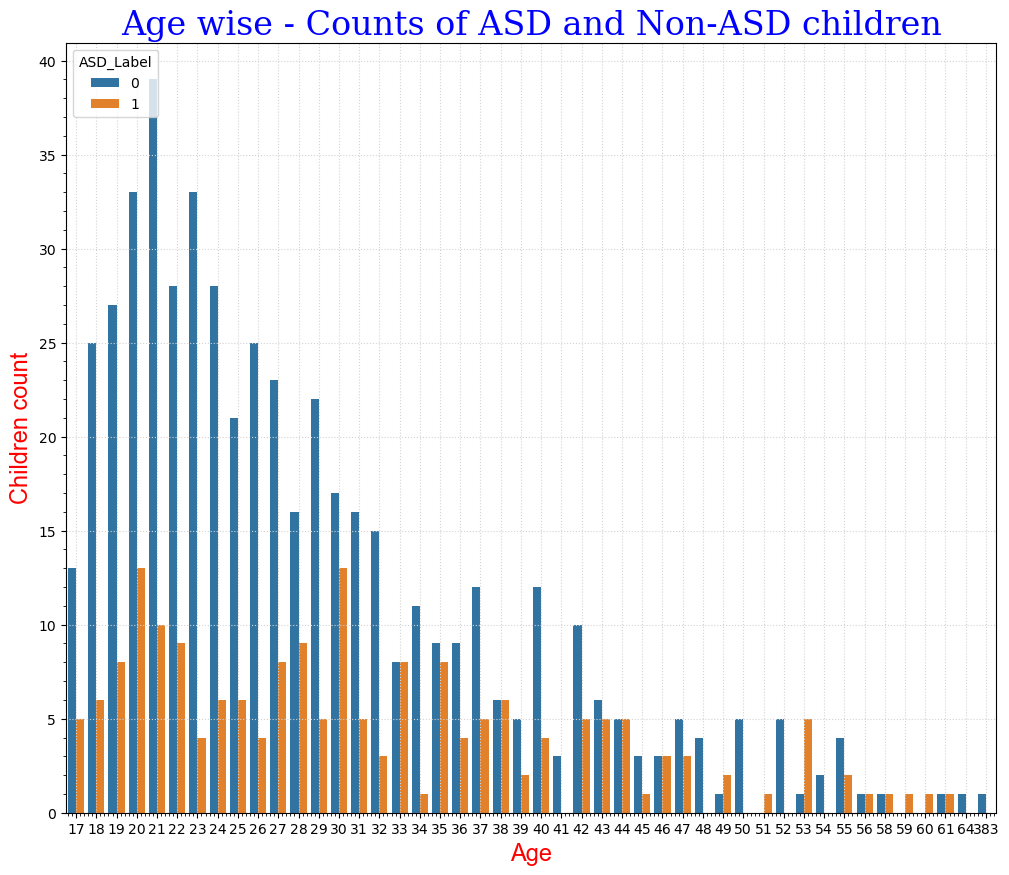

In [170]:
# Ensure that the 'ASD_Label' column is categorical
age_details['ASD_Label'] = age_details['ASD_Label'].astype(str)

# Font settings
label_fonts = {'family': 'arial', 'size': 17, 'color': 'red'}
title_font = {'family': 'serif', 'size': 24, 'color': 'Blue'}

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x=age_details['fix_age'], y=age_details['child_counts'], hue=age_details['ASD_Label'])
plt.minorticks_on()
plt.grid(which='major', linestyle=':', color='lightgray')
plt.xlabel('Age', fontdict=label_fonts)
plt.ylabel('Children count', fontdict=label_fonts)
plt.title('Age wise - Counts of ASD and Non-ASD children', fontdict=title_font)

plt.show()


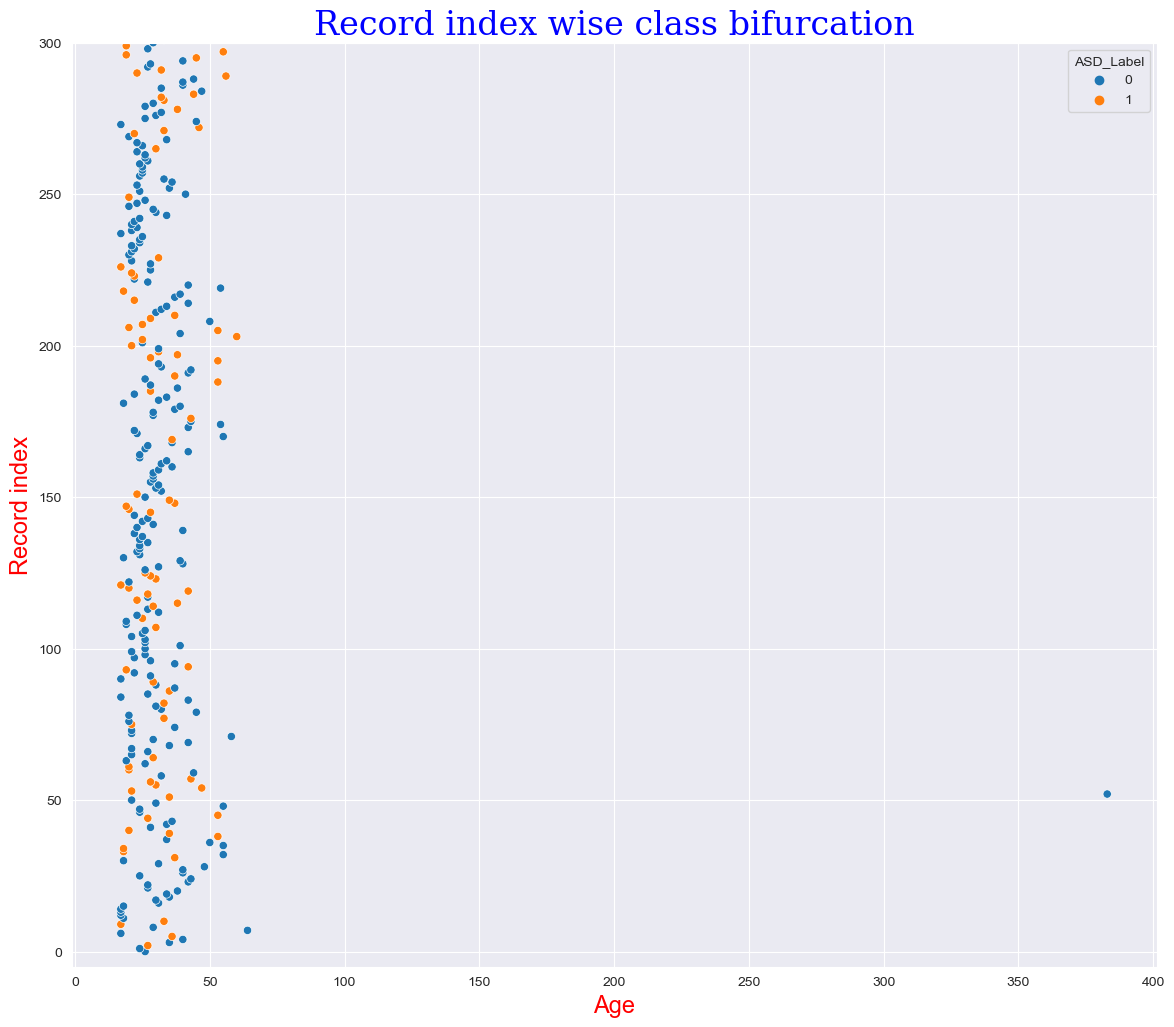

In [171]:
plt.figure(figsize=(14, 12))
sns.set_style('darkgrid')

# Corrected scatterplot without `x_bins`
sns.scatterplot(x=autism_df['fix_age'], y=autism_df.index, hue=autism_df['ASD_Label'], legend='brief')

plt.minorticks_on()
plt.axis(ymin=-5, ymax=300)
plt.xlabel('Age', fontdict=label_fonts)
plt.ylabel('Record index', fontdict=label_fonts)
plt.title('Record index wise class bifurcation', fontdict=title_font)
plt.show()


### ***Q3. Does GENDER corresponds to ASD in children?***

In [172]:
pd.DataFrame(autism_df['gender'].value_counts())

,count
gender,
1,367
0,337


In [173]:
pd.DataFrame(autism_df.groupby(['gender','ASD_Label']).count()['fix_age'])

fix_age
gender ASD_Label         
0      0              234
       1              103
1      0              281
       1               86

In [174]:
gender_details = pd.DataFrame(autism_df.groupby(['gender','ASD_Label']).count()['fix_age'])

In [175]:
gender_details.columns = ['gender_wise_count']

In [176]:
gender_details.reset_index(inplace=True)

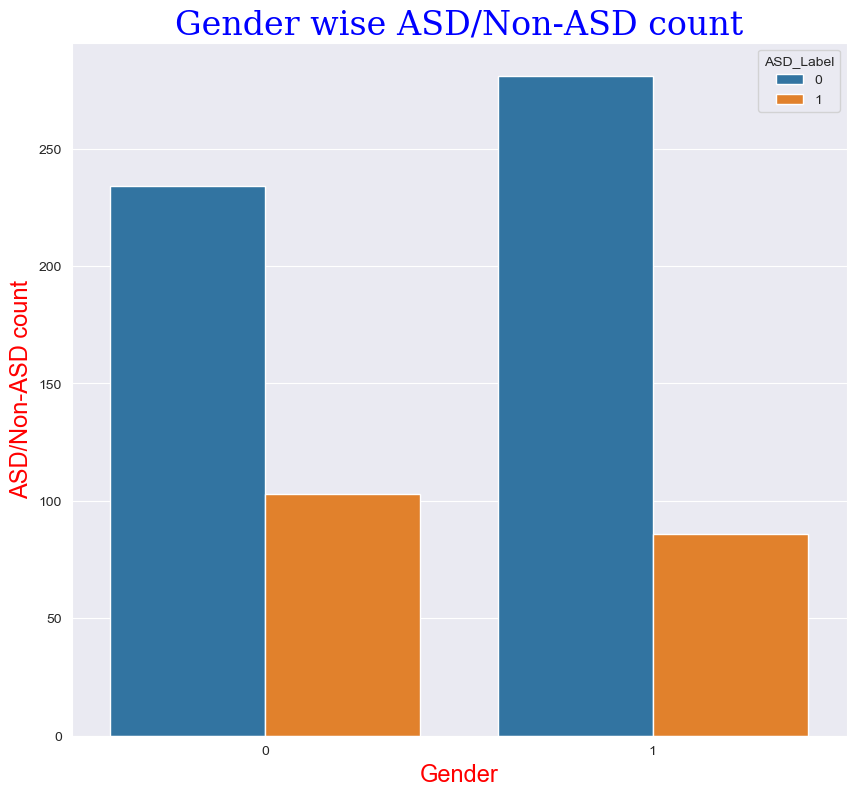

In [177]:
# Convert 'ASD_Label' to string to avoid AttributeError
gender_details['ASD_Label'] = gender_details['ASD_Label'].astype(str)

plt.figure(figsize=(10, 9))
sns.barplot(x=gender_details['gender'], y=gender_details['gender_wise_count'], hue=gender_details['ASD_Label'])
plt.minorticks_on()
plt.xlabel('Gender', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD count', fontdict=label_fonts)
plt.title('Gender wise ASD/Non-ASD count', fontdict=title_font)
plt.show()

### ***Q4. Does children of every country are affected with ASD?***

In [178]:
pd.DataFrame(autism_df['country'].value_counts())

,count
country,
9,178
2,113
8,82
5,81
1,81
0,77
4,47
3,27
7,15


In [179]:
pd.DataFrame(autism_df.groupby(['country','ASD_Label']).count()['fix_age'])

fix_age
country ASD_Label         
0       0               48
        1               29
1       0               75
        1                6
2       0               60
        1               53
3       0               15
        1               12
4       0               45
        1                2
5       0               66
        1               15
6       0                3
7       0                5
        1               10
8       0               79
        1                3
9       0              119
        1               59

In [180]:
country_details = pd.DataFrame(autism_df.groupby(['country','ASD_Label']).count()['fix_age'])
country_details.columns = ['Country_wise_count']
country_details.reset_index(inplace=True)

In [181]:
country_details

,country,ASD_Label,Country_wise_count
0,0,0,48
1,0,1,29
2,1,0,75
3,1,1,6
4,2,0,60
5,2,1,53
6,3,0,15
7,3,1,12
8,4,0,45
9,4,1,2


In [182]:
country_details['country_name'] = country_details['country'].map({0:'United Kingdom',1:'India',2:'United States',3:'Australia',4:'Jordan',5:'New Zealand',6:'Egypt',7:'Canada',
                                                                  8:'UAE',9:'Others'})

In [183]:
country_details

,country,ASD_Label,Country_wise_count,country_name
0,0,0,48,United Kingdom
1,0,1,29,United Kingdom
2,1,0,75,India
3,1,1,6,India
4,2,0,60,United States
5,2,1,53,United States
6,3,0,15,Australia
7,3,1,12,Australia
8,4,0,45,Jordan
9,4,1,2,Jordan


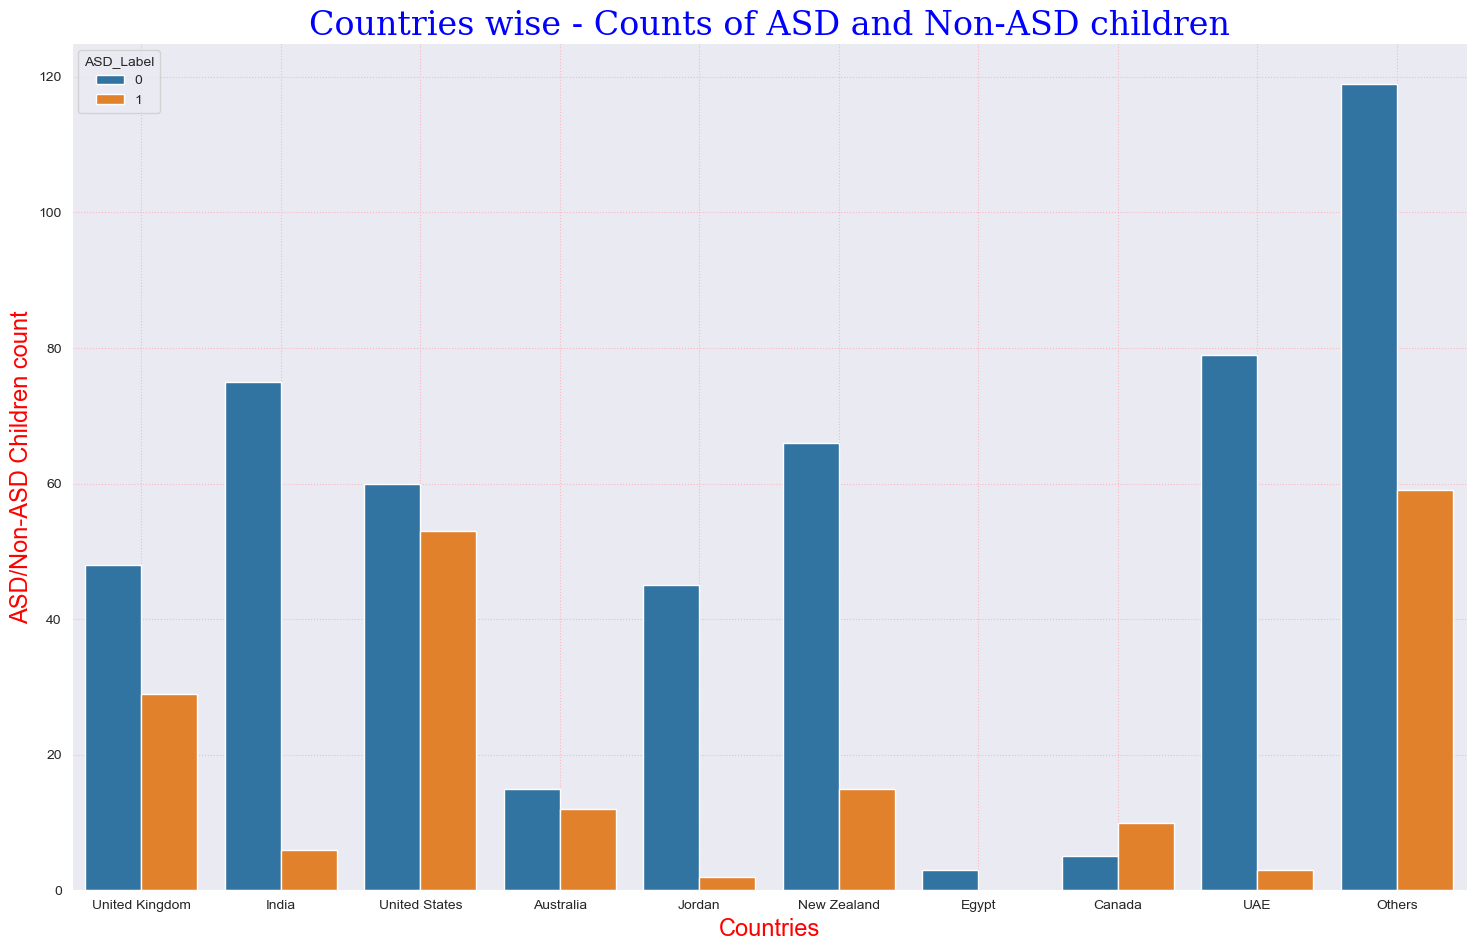

In [184]:
# Convert 'ASD_Label' to string to avoid AttributeError
country_details['ASD_Label'] = country_details['ASD_Label'].astype(str)

plt.figure(figsize=(18, 11))
sns.barplot(
    x=country_details['country_name'], 
    y=country_details['Country_wise_count'], 
    hue=country_details['ASD_Label']
)
plt.minorticks_on()
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Countries', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('Countries wise - Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q5. Does BIRTH JAUNDICE corresponds to ASD?***

In [185]:
pd.DataFrame(autism_df['born_with_jaundice'].value_counts())

,count
born_with_jaundice,
0,635
1,69


In [186]:
pd.DataFrame(autism_df.groupby(['born_with_jaundice','ASD_Label']).count()['fix_age'])

fix_age
born_with_jaundice ASD_Label         
0                  0              474
                   1              161
1                  0               41
                   1               28

In [187]:
jaundice_details = pd.DataFrame(autism_df.groupby(['born_with_jaundice','ASD_Label']).count()['fix_age'])
jaundice_details.columns = ['jaundice_wise_counts']
jaundice_details.reset_index(inplace=True)

In [188]:
jaundice_details

,born_with_jaundice,ASD_Label,jaundice_wise_counts
0,0,0,474
1,0,1,161
2,1,0,41
3,1,1,28


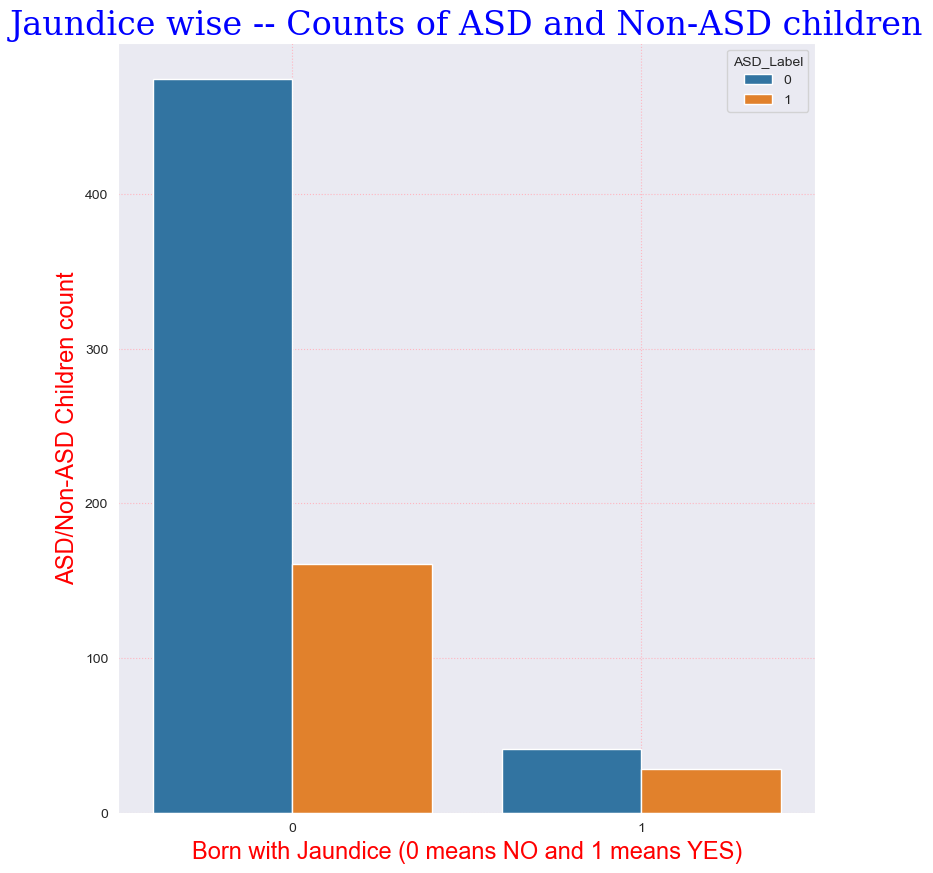

In [189]:
# Convert 'ASD_Label' to string to avoid AttributeError
jaundice_details['ASD_Label'] = jaundice_details['ASD_Label'].astype(str)

plt.figure(figsize=(9, 10))
sns.barplot(
    x=jaundice_details['born_with_jaundice'], 
    y=jaundice_details['jaundice_wise_counts'], 
    hue=jaundice_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Born with Jaundice (0 means NO and 1 means YES)', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('Jaundice wise -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q6: Does PDD history in Family corresponds to ASD?***

In [190]:
pd.DataFrame(autism_df['family_member_with_PDD'].value_counts())

,count
family_member_with_PDD,
0,613
1,91


In [191]:
pd.DataFrame(autism_df.groupby(['family_member_with_PDD','ASD_Label']).count()['fix_age'])

fix_age
family_member_with_PDD ASD_Label         
0                      0              467
                       1              146
1                      0               48
                       1               43

In [192]:
PDD_details = pd.DataFrame(autism_df.groupby(['family_member_with_PDD','ASD_Label']).count()['fix_age'])
PDD_details.columns = ['PDD_wise_counts']
PDD_details.reset_index(inplace=True)

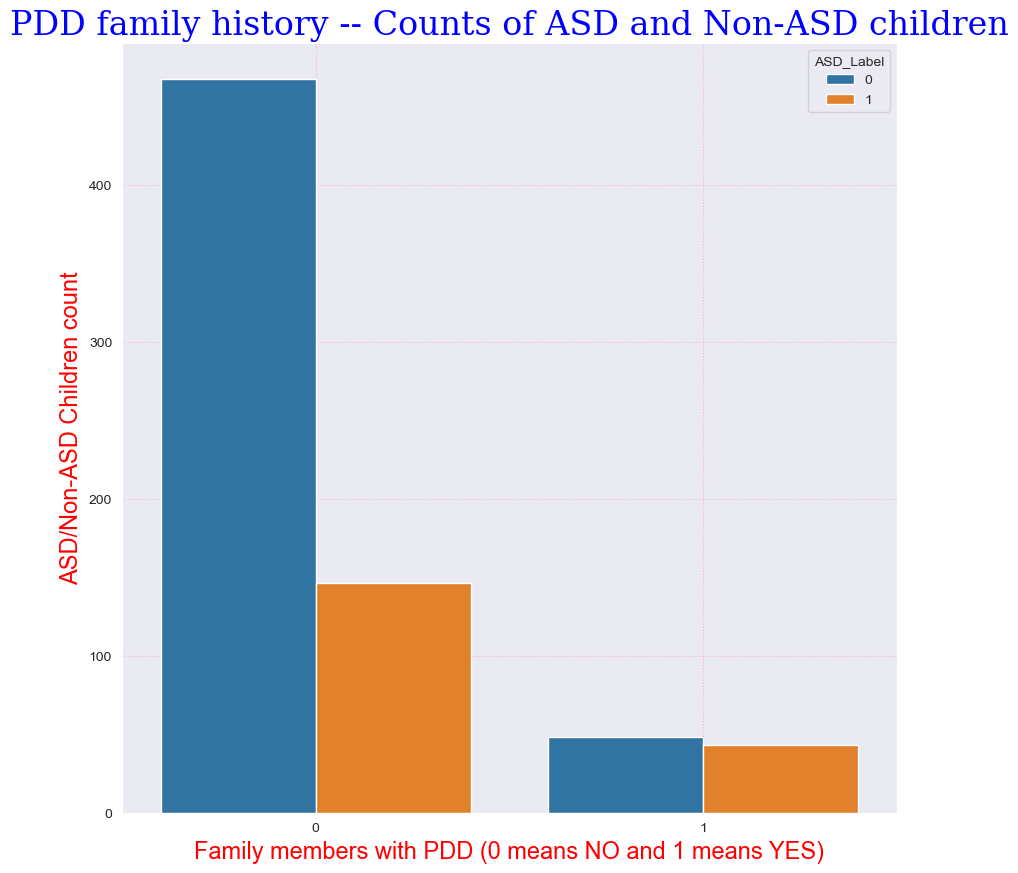

In [193]:
# Convert 'ASD_Label' to string to ensure compatibility with Seaborn
PDD_details['ASD_Label'] = PDD_details['ASD_Label'].astype(str)

plt.figure(figsize=(10, 10))
sns.barplot(
    x=PDD_details['family_member_with_PDD'], 
    y=PDD_details['PDD_wise_counts'], 
    hue=PDD_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Family members with PDD (0 means NO and 1 means YES)', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('PDD family history -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q7: Does Usage of screening app in past relates to ASD?***

In [194]:
pd.DataFrame(autism_df['used_screening_app_before'].value_counts())

,count
used_screening_app_before,
0,692
1,12


In [195]:
pd.DataFrame(autism_df.groupby(['used_screening_app_before','ASD_Label']).count()['fix_age'])

fix_age
used_screening_app_before ASD_Label         
0                         0              508
                          1              184
1                         0                7
                          1                5

In [196]:
screening_app_details = pd.DataFrame(autism_df.groupby(['used_screening_app_before','ASD_Label']).count()['fix_age'])
screening_app_details.columns = ['Screening_app_counts']
screening_app_details.reset_index(inplace=True)

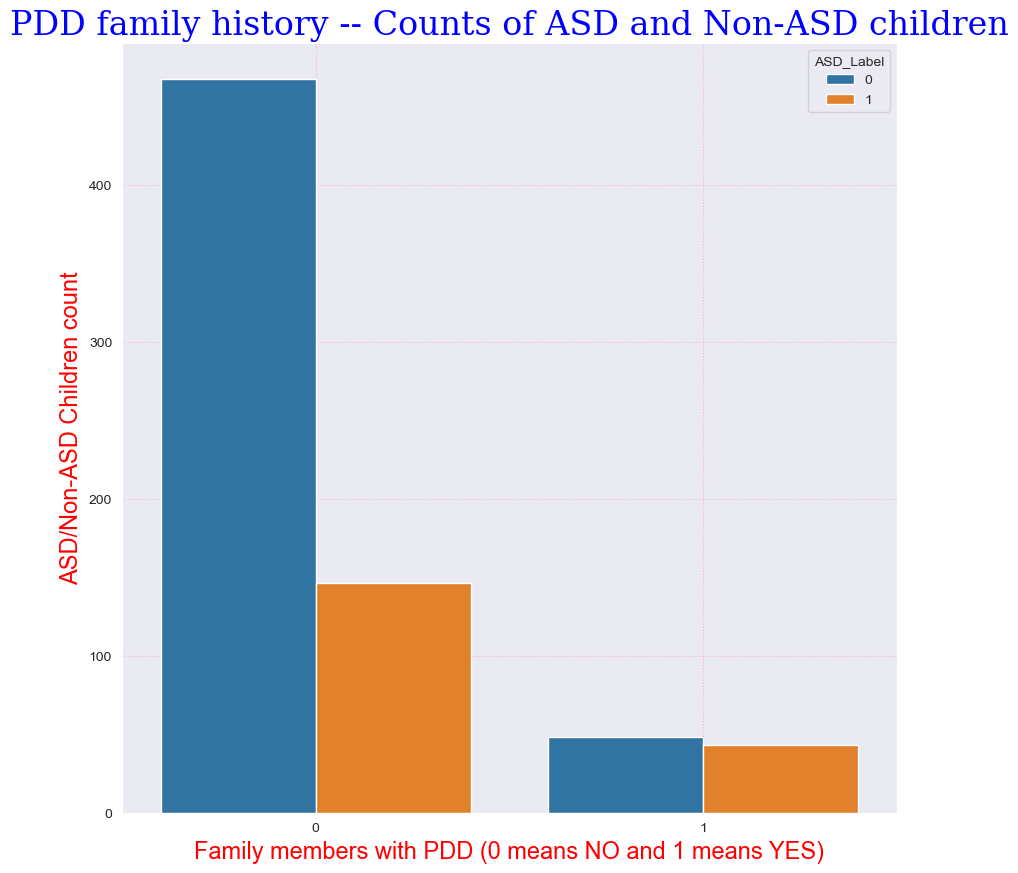

In [197]:
# Convert 'ASD_Label' to string to ensure compatibility with Seaborn
PDD_details['ASD_Label'] = PDD_details['ASD_Label'].astype(str)

plt.figure(figsize=(10, 10))
sns.barplot(
    x=PDD_details['family_member_with_PDD'], 
    y=PDD_details['PDD_wise_counts'], 
    hue=PDD_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel('Family members with PDD (0 means NO and 1 means YES)', fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('PDD family history -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


### ***Q8: What picture screening score tells us about ASD?***

In [198]:
autism_df['screening_score'].value_counts()

screening_score
4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: count, dtype: int64

In [199]:
pd.DataFrame(autism_df.groupby(['screening_score','ASD_Label']).count()['fix_age'])

,,fix_age
screening_score,ASD_Label,
0,0,14
1,0,33
2,0,74
3,0,110
4,0,131
5,0,83
6,0,70
7,1,57
8,1,55


In [200]:
pd.DataFrame(autism_df['ASD_Label'].value_counts())

,count
ASD_Label,
0,515
1,189


### ***Q9: What 'family_member_with_PDD','born_with_jaundice' and 'Q10_Score' tells us together?***

In [201]:
pd.DataFrame(autism_df.groupby(['family_member_with_PDD','born_with_jaundice','Q10_Score','ASD_Label']).count()['fix_age'])

fix_age
family_member_with_PDD born_with_jaundice Q10_Score ASD_Label         
0                      0                  0         0              243
                                                    1               16
                                          1         0              192
                                                    1              113
                       1                  0         0               16
                                          1         0               16
                                                    1               17
1                      0                  0         0               16
                                                    1                1
                                          1         0               23
                                                    1               31
                       1                  0         0                4
                                                    1                4
                                          1         0                5
                                                    1                7

### ***Q10. Does ETHNICITY corresponds to ASD?***

In [202]:
pd.DataFrame(autism_df['fix_ethnicity'].value_counts())

,count
fix_ethnicity,
0,236
2,136
1,135
5,101
4,58
3,38


In [203]:
#'White-European':0,'Asian':1,'Middle Eastern':2,'South Asian':3,'Black':4,'Others':5
pd.DataFrame(autism_df.groupby(['fix_ethnicity','ASD_Label']).count()['fix_age'])

fix_age
fix_ethnicity ASD_Label         
0             0              127
              1              109
1             0              118
              1               17
2             0              126
              1               10
3             0               34
              1                4
4             0               40
              1               18
5             0               70
              1               31

In [204]:
ethnicity_details = pd.DataFrame(autism_df.groupby(['fix_ethnicity','ASD_Label']).count()['fix_age'])
ethnicity_details.columns = ['ethnicity_wise_counts']
ethnicity_details.reset_index(inplace=True)
ethnicity_details['name'] = ethnicity_details['fix_ethnicity'].map({0:'White-European',1:'Asian',2:'Middle Eastern',3:'South Asian',4:'Black',5:'Others'})

In [205]:
ethnicity_details

,fix_ethnicity,ASD_Label,ethnicity_wise_counts,name
0,0,0,127,White-European
1,0,1,109,White-European
2,1,0,118,Asian
3,1,1,17,Asian
4,2,0,126,Middle Eastern
5,2,1,10,Middle Eastern
6,3,0,34,South Asian
7,3,1,4,South Asian
8,4,0,40,Black
9,4,1,18,Black


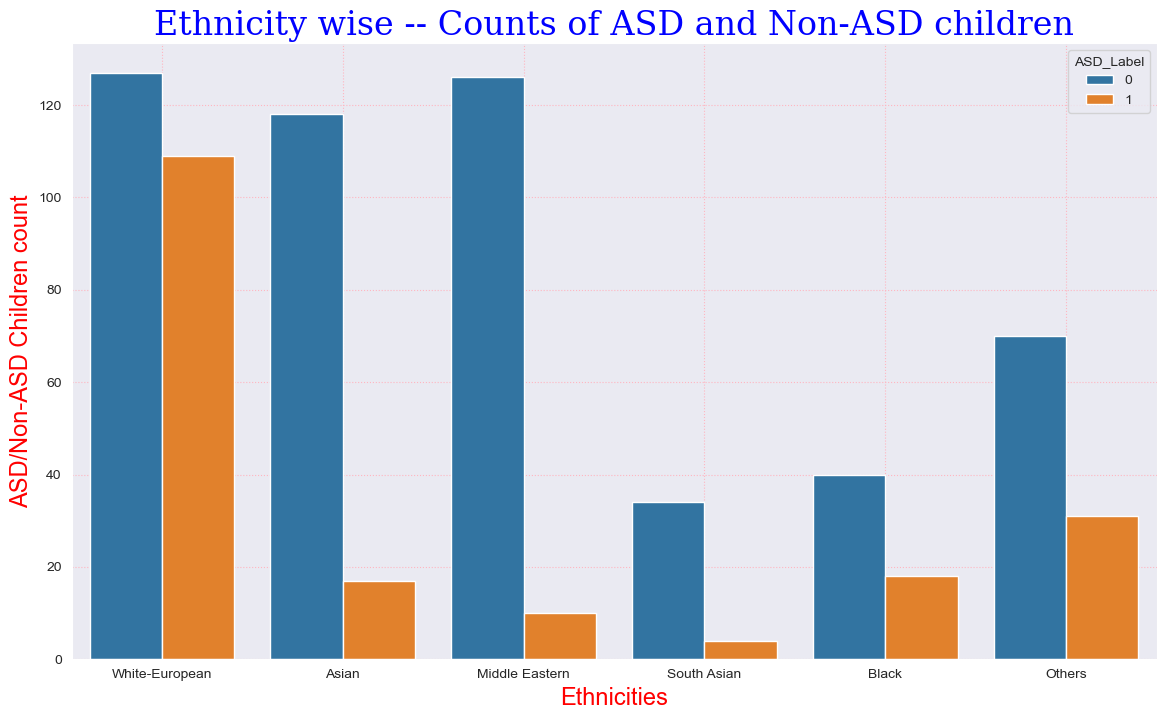

In [206]:
# Ensure 'ASD_Label' is treated as a categorical variable
ethnicity_details['ASD_Label'] = ethnicity_details['ASD_Label'].astype(str)

# Plot the barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    x=ethnicity_details['name'], 
    y=ethnicity_details['ethnicity_wise_counts'], 
    hue=ethnicity_details['ASD_Label']
)
plt.grid(which='major', linestyle=':', color='lightpink')
plt.xlabel("Ethnicities", fontdict=label_fonts)
plt.ylabel('ASD/Non-ASD Children count', fontdict=label_fonts)
plt.title('Ethnicity wise -- Counts of ASD and Non-ASD children', fontdict=title_font)
plt.show()


# ***Features Co-Relation***

/Users/malinisenthilkumar/anaconda3/envs/phd-env/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


(21.5, -0.5)

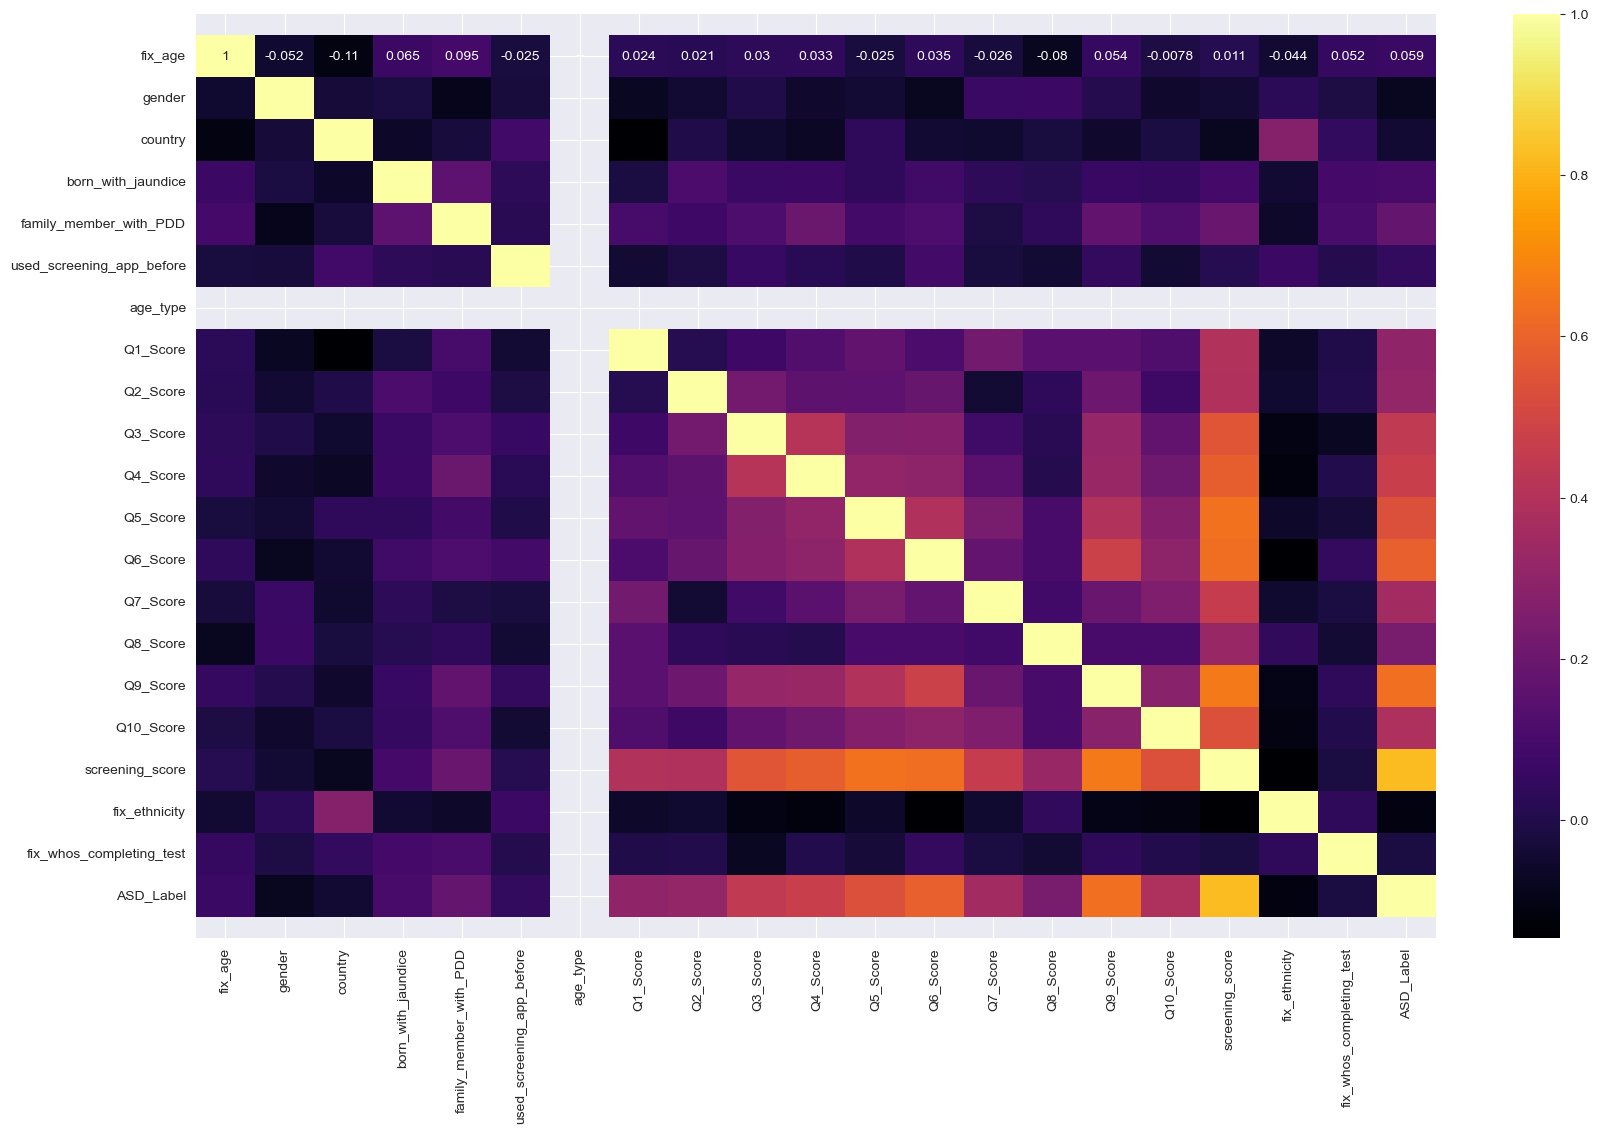

In [207]:
plt.figure(figsize=(20,12))
fig = sns.heatmap(autism_df.corr(),cmap='inferno',annot=True)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)

#### ***Dropping SCREENING_SCORE feature from the dataset as it is highly co-related with the TARGET Label***

In [208]:
autism_df.drop(['screening_score'],axis=1,inplace=True)

/var/folders/98/4q14t9j108gf7k1h62m97blr0000gn/T/ipykernel_88417/2560007290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_df.drop(['screening_score'],axis=1,inplace=True)


# ***Pre-Confirmatory Data Analysis or Comparative Models Assessment***

## ***Import Machine Learning Classifiers***

In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score as acc_scr
from sklearn.metrics import recall_score as rec_scr
from sklearn.metrics import precision_score as prec_scr
from sklearn.metrics import roc_curve, roc_auc_score, auc,precision_recall_curve as prec_rec_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
from tensorflow import keras

In [210]:
autism_df.columns

Index(['fix_age', 'gender', 'country', 'born_with_jaundice',
       'family_member_with_PDD', 'used_screening_app_before', 'age_type',
       'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score',
       'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score', 'fix_ethnicity',
       'fix_whos_completing_test', 'ASD_Label'],
      dtype='object')

In [211]:
# Split the dataset into features and target variable
X = autism_df.drop('ASD_Label', axis=1)
y = autism_df['ASD_Label']

In [212]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   fix_age                    704 non-null    int64
 1   gender                     704 non-null    int64
 2   country                    704 non-null    int64
 3   born_with_jaundice         704 non-null    int64
 4   family_member_with_PDD     704 non-null    int64
 5   used_screening_app_before  704 non-null    int64
 6   age_type                   704 non-null    int64
 7   Q1_Score                   704 non-null    int64
 8   Q2_Score                   704 non-null    int64
 9   Q3_Score                   704 non-null    int64
 10  Q4_Score                   704 non-null    int64
 11  Q5_Score                   704 non-null    int64
 12  Q6_Score                   704 non-null    int64
 13  Q7_Score                   704 non-null    int64
 14  Q8_Score                  

In [213]:
# Random-Oversampling

a1=X
b1=y
ros = RandomOverSampler(sampling_strategy="minority")
X, y = ros.fit_resample(a1, b1)
X.shape[0] - a1.shape[0]

326

In [214]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
#X = scaler.fit_transform(X)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

In [215]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [216]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(659, 19) (206, 19) (659,) (206,)


In [217]:
# Convert the datasets to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [218]:
# Batch and shuffle the datasets
batch_size = 10
train_dataset = train_dataset.shuffle(len(X_train)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

## III. Base Neural Network Model

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [220]:
#Input Size
X_train.shape[1]

19

In [221]:
# Define the model architecture
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

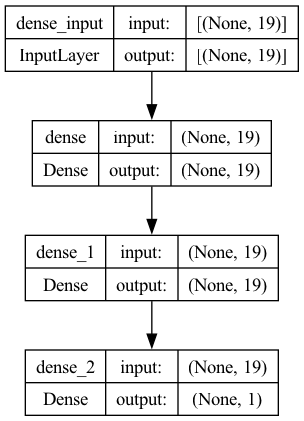

In [222]:
plot_model(model, to_file='model.png', show_shapes=True)

In [223]:
# Compile model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [224]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10, verbose=1)
history = model.fit(train_dataset, 
                    validation_data=val_dataset, epochs=150, callbacks=[early_stop])

Epoch 1/150
66/66 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.8498 - val_loss: 0.3621 - val_accuracy: 0.8606
Epoch 2/150
66/66 [==============================] - 0s 600us/step - loss: 0.2414 - accuracy: 0.9530 - val_loss: 0.1992 - val_accuracy: 0.9333
Epoch 3/150
66/66 [==============================] - 0s 641us/step - loss: 0.1302 - accuracy: 0.9848 - val_loss: 0.1251 - val_accuracy: 0.9758
Epoch 4/150
66/66 [==============================] - 0s 653us/step - loss: 0.0810 - accuracy: 0.9848 - val_loss: 0.0926 - val_accuracy: 0.9758
Epoch 5/150
66/66 [==============================] - 0s 670us/step - loss: 0.0570 - accuracy: 0.9894 - val_loss: 0.0721 - val_accuracy: 0.9879
Epoch 6/150
66/66 [==============================] - 0s 999us/step - loss: 0.0418 - accuracy: 0.9939 - val_loss: 0.0579 - val_accuracy: 0.9879
Epoch 7/150
66/66 [==============================] - 0s 665us/step - loss: 0.0315 - accuracy: 0.9985 - val_loss: 0.0473 - val_accuracy: 0.9879
E

In [225]:
#Evaluate model on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)

print('Val Loss:', val_loss)
print('Val Accuracy:', val_acc)

6/6 [==============================] - 0s 806us/step - loss: 0.0114 - accuracy: 0.9939
Val Loss: 0.011428860016167164
Val Accuracy: 0.9939393997192383


In [226]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

7/7 [==============================] - 0s 711us/step - loss: 0.0043 - accuracy: 1.0000
Test Loss: 0.0043257554061710835
Test Accuracy: 1.0


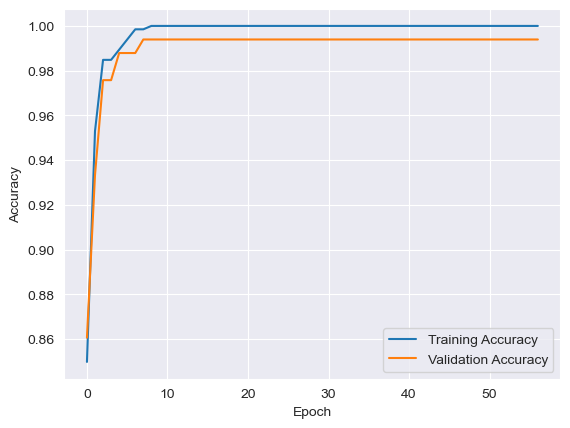

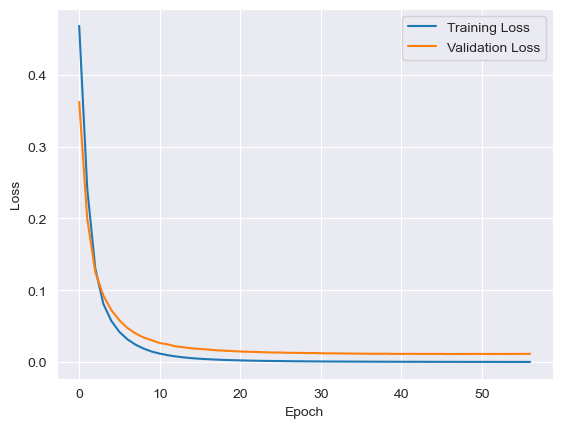

In [227]:
# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs Epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [228]:
y_pred_m1 = model.predict(X_test)
y_pred_m1 = np.round(y_pred_m1)

7/7 [==============================] - 0s 1ms/step


In [229]:
print(classification_report(y_test, y_pred_m1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       109

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



## IV. Improved Network Architecture 

In [230]:
# Define the model architecture
model2 = Sequential()
model2.add(Dense(31, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=keras.regularizers.l2(0.03)))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

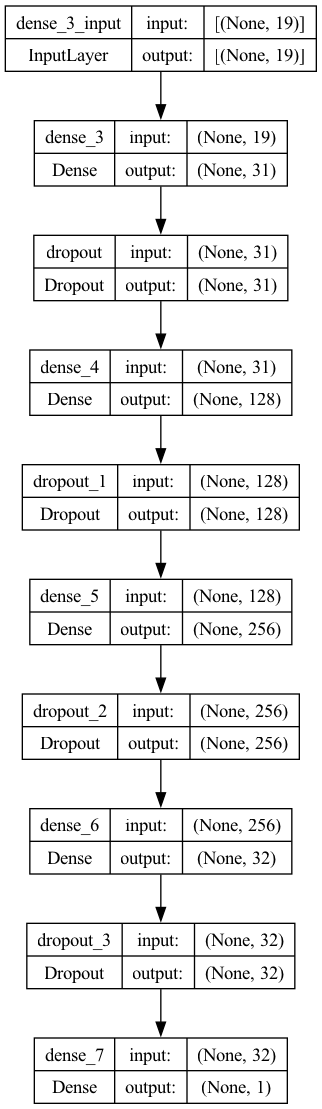

In [231]:
plot_model(model2, to_file='model.png', show_shapes=True)

In [232]:
# Compile model
model2.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon= 1e-07,
    amsgrad=False,
    weight_decay= 1e-6,
    use_ema = True,
    ema_momentum = 0.8,
    ema_overwrite_frequency = 10,
    jit_compile=True,
    ),loss='binary_crossentropy', metrics=['accuracy'])

In [233]:
early_stop = EarlyStopping(patience=20, verbose=1)
history = model2.fit(train_dataset, 
                    validation_data=val_dataset, epochs=250, 
                    batch_size=8)

Epoch 1/250
66/66 [==============================] - 1s 2ms/step - loss: 1.2668 - accuracy: 0.7602 - val_loss: 1.0822 - val_accuracy: 0.9152
Epoch 2/250
66/66 [==============================] - 0s 1ms/step - loss: 1.0119 - accuracy: 0.8574 - val_loss: 0.8142 - val_accuracy: 0.9091
Epoch 3/250
66/66 [==============================] - 0s 835us/step - loss: 0.8180 - accuracy: 0.9029 - val_loss: 0.6762 - val_accuracy: 0.9576
Epoch 4/250
66/66 [==============================] - 0s 865us/step - loss: 0.7146 - accuracy: 0.9196 - val_loss: 0.6104 - val_accuracy: 0.9636
Epoch 5/250
66/66 [==============================] - 0s 768us/step - loss: 0.6554 - accuracy: 0.9226 - val_loss: 0.5691 - val_accuracy: 0.9758
Epoch 6/250
66/66 [==============================] - 0s 808us/step - loss: 0.5930 - accuracy: 0.9393 - val_loss: 0.5252 - val_accuracy: 0.9636
Epoch 7/250
66/66 [==============================] - 0s 701us/step - loss: 0.5781 - accuracy: 0.9393 - val_loss: 0.5008 - val_accuracy: 0.9758
Epo

## V. Model Evaluation

In [234]:
#Evaluate model on validation set
val_loss, val_acc = model2.evaluate(X_val, y_val)

print('Val Loss:', val_loss)
print('Val Accuracy:', val_acc)

6/6 [==============================] - 0s 865us/step - loss: 0.0053 - accuracy: 1.0000
Val Loss: 0.005264515057206154
Val Accuracy: 1.0


In [235]:
# Evaluate model on test set
test_loss, test_acc = model2.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

7/7 [==============================] - 0s 726us/step - loss: 0.0203 - accuracy: 0.9951
Test Loss: 0.020287517458200455
Test Accuracy: 0.9951456189155579


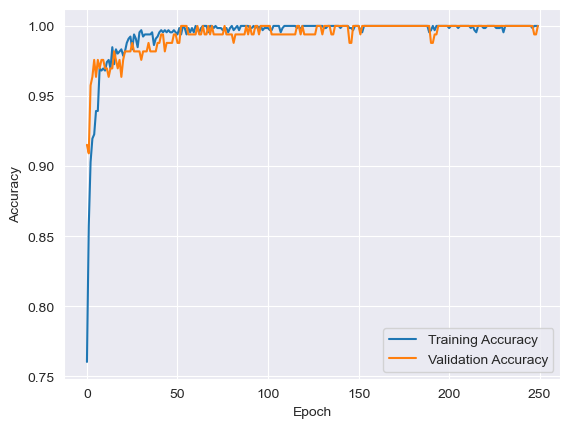

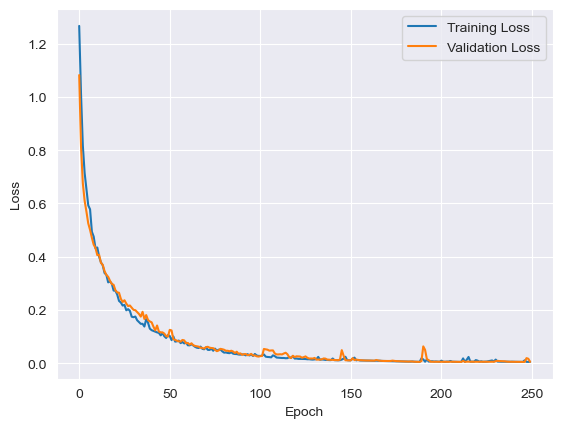

In [236]:
# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs Epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [237]:
y_pred_m2 = model2.predict(X_test)
y_pred_m2 = np.round(y_pred_m2)

7/7 [==============================] - 0s 496us/step


In [238]:
print(classification_report(y_test, y_pred_m2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       0.99      1.00      1.00       109

    accuracy                           1.00       206
   macro avg       1.00      0.99      1.00       206
weighted avg       1.00      1.00      1.00       206

